

# dataset : https://drive.google.com/drive/folders/1AW1EMseCrCMj8EErUWrlNppXotg4jcDv?usp=sharing



In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!unzip pokemonclassification.zip

Archive:  pokemonclassification.zip
   creating: PokemonData/Abra/
  inflating: PokemonData/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg  
  inflating: PokemonData/Abra/06b9eec4827d4d49b1b4c284308708df.jpg  
  inflating: PokemonData/Abra/10a9f06ec6524c66b779ea80354f8519.jpg  
  inflating: PokemonData/Abra/1788abb8b51f48509cfac8067bd99e14.jpg  
  inflating: PokemonData/Abra/28cfad92ad934d1f9b579cbff4b5d012.jpg  
  inflating: PokemonData/Abra/2eb2a528f9a247358452b3c740df69a0.jpg  
  inflating: PokemonData/Abra/2fd28e699b7c4208acd1637fbad5df2d.jpeg  
  inflating: PokemonData/Abra/32240b108a8140f8b31c495166fc453c.jpg  
  inflating: PokemonData/Abra/34532bb006714727ade4075f0a72b92d.jpg  
  inflating: PokemonData/Abra/3680c3f65a484c3ba05a7cb93e1d7ae3.jpg  
  inflating: PokemonData/Abra/3c4ab4f4e1d548e5bc038715b47b4d51.jpg  
  inflating: PokemonData/Abra/48412baa8527483d8e8ddb8555d2eeff.jpg  
  inflating: PokemonData/Abra/4e554e4a0f624656a7b1542b679b6157.jpg  
  inflating: PokemonData/Abra/586c1

# Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path = '/content/PokemonData'

In [8]:
import os

In [9]:
kategori = os.listdir(path)
kategori

['Beedrill', 'Dewgong', 'Drowzee', 'Abra', 'Caterpie']

In [10]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [11]:
path_gambar = '/content/PokemonData/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg'

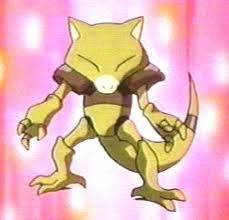

In [12]:
image = load_img(path_gambar)
image

In [26]:
bright = random_brightness(image, max_delta=0.50);

Text(0.5, 1.0, 'gambar sebelum augmentasi')

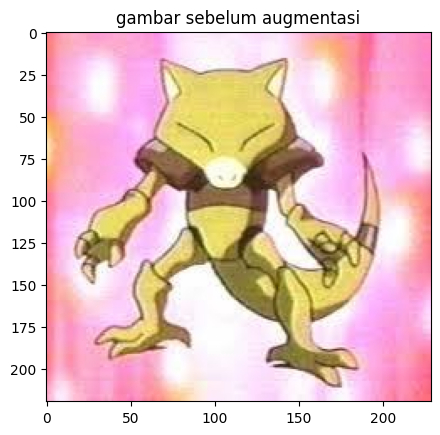

In [27]:
plt.imshow(image)
plt.title('gambar sebelum augmentasi')

Text(0.5, 1.0, 'gambar setelah augmentasi')

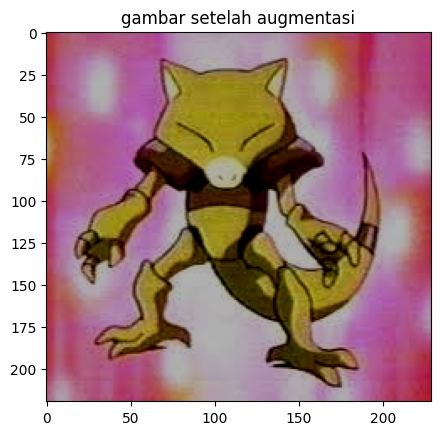

In [28]:
plt.imshow(bright.numpy().astype('uint8'))
plt.title('gambar setelah augmentasi')

# imagedatagenerator

In [29]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,

    shear_range = 0.1,
    width_shift_range = 0.3,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,

    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)

In [30]:
train_dataset = train_datagen.flow_from_directory(
    path,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_dataset = val_datagen.flow_from_directory(
    path,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 153 images belonging to 5 classes.
Found 35 images belonging to 5 classes.


In [31]:
train_dataset.class_indices

{'Abra': 0, 'Beedrill': 1, 'Caterpie': 2, 'Dewgong': 3, 'Drowzee': 4}

In [48]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 18, 18, 32)       

Epoch 1/10
5/5 [==============================] - 1s 256ms/step - loss: 0.1960 - accuracy: 0.9346 - val_loss: 0.3132 - val_accuracy: 0.8857
Epoch 2/10
5/5 [==============================] - 1s 241ms/step - loss: 0.1733 - accuracy: 0.9281 - val_loss: 0.3669 - val_accuracy: 0.8857
Epoch 3/10
5/5 [==============================] - 1s 233ms/step - loss: 0.2134 - accuracy: 0.9085 - val_loss: 0.2556 - val_accuracy: 0.8571
Epoch 4/10
5/5 [==============================] - 1s 233ms/step - loss: 0.1792 - accuracy: 0.9346 - val_loss: 0.2554 - val_accuracy: 0.8571
Epoch 5/10
5/5 [==============================] - 1s 238ms/step - loss: 0.1546 - accuracy: 0.9346 - val_loss: 0.2649 - val_accuracy: 0.8571
Epoch 6/10
5/5 [==============================] - 1s 235ms/step - loss: 0.1324 - accuracy: 0.9477 - val_loss: 0.2867 - val_accuracy: 0.8857
Epoch 7/10
5/5 [==============================] - 2s 396ms/step - loss: 0.1350 - accuracy: 0.9542 - val_loss: 0.3751 - val_accuracy: 0.8286
Epoch 8/10
5/5 [====

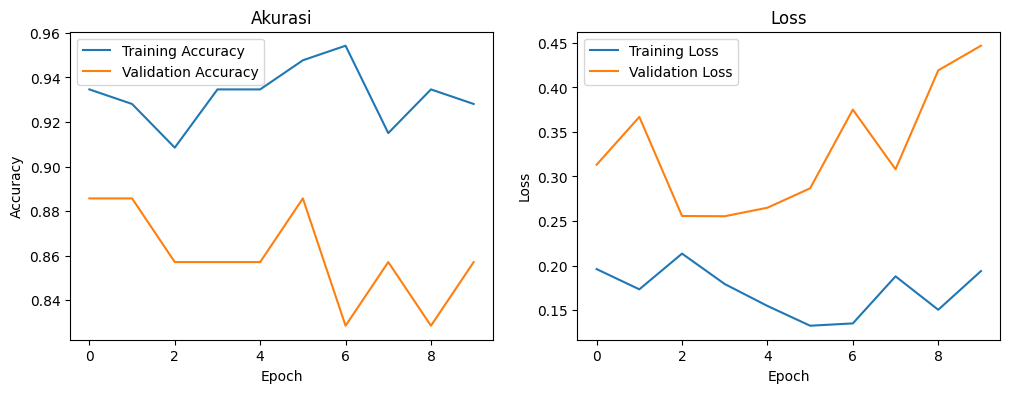

In [71]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Lakukan pelatihan model Anda dengan model.fit() dan perolehan history
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10, verbose=1)

# Dapatkan data metrik dari history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Akurasi')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [68]:
model.evaluate(validation_dataset)

2/2 [==============================] - 0s 11ms/step - loss: 0.3789 - accuracy: 0.8571


[0.3789445459842682, 0.8571428656578064]

1/1 [==============================] - 0s 24ms/step


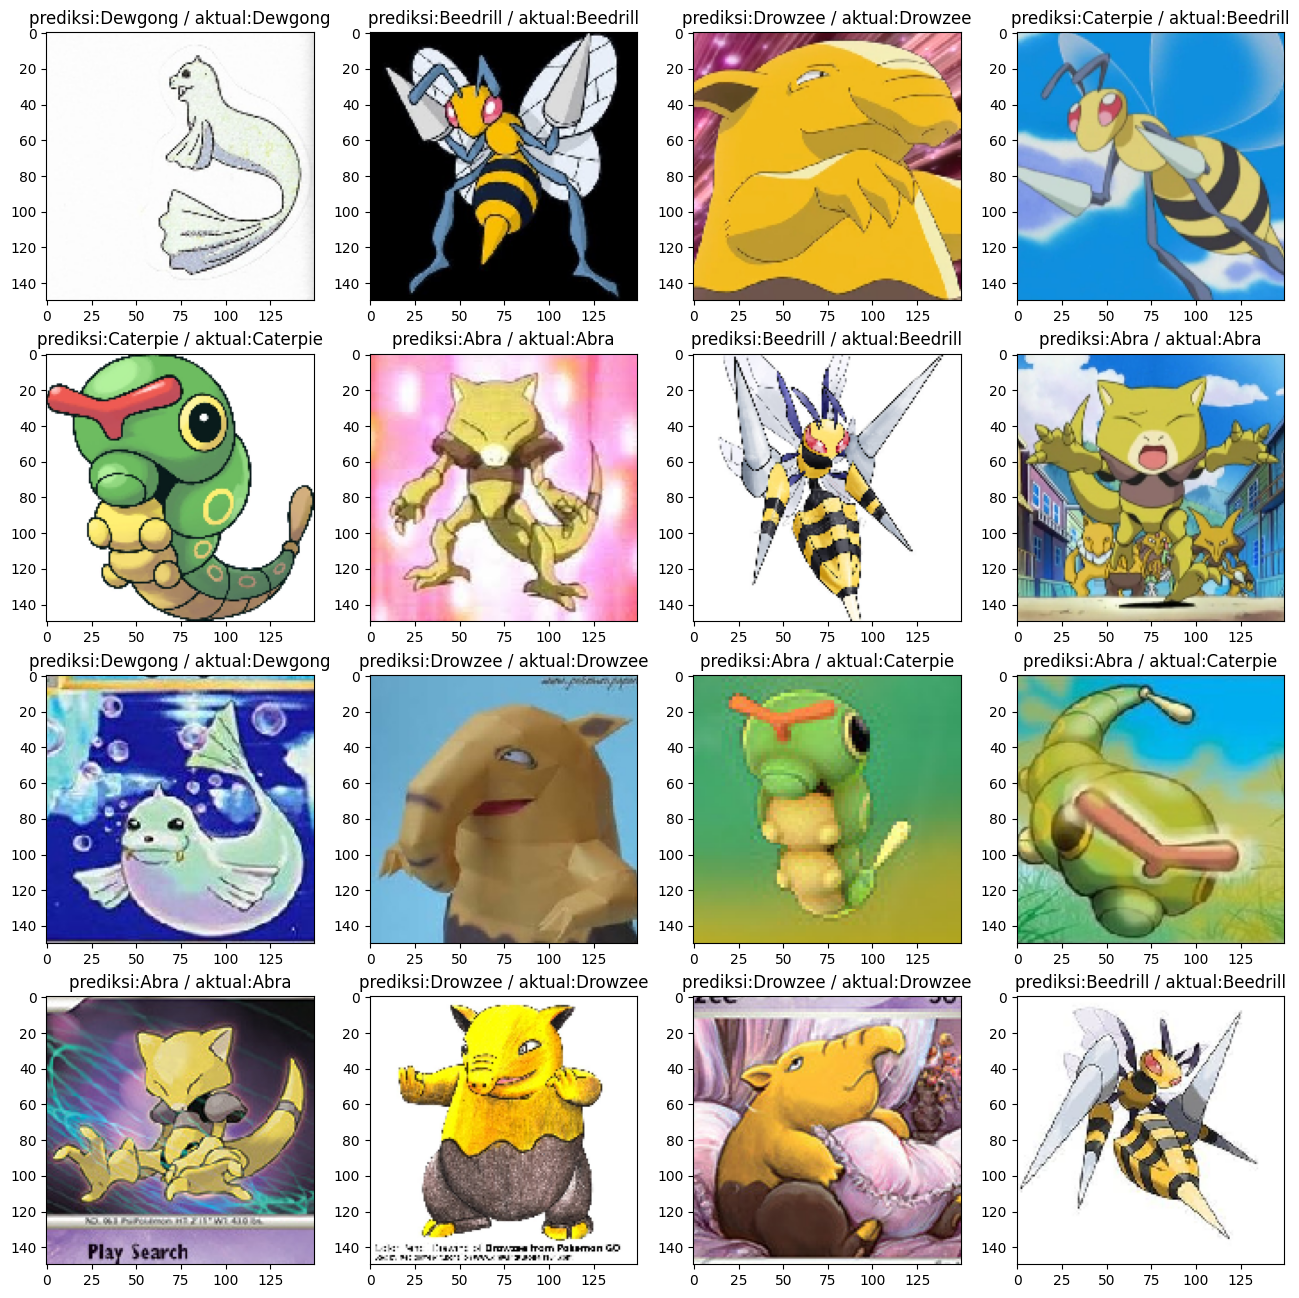

In [69]:
test_x, test_y = validation_dataset.__getitem__(0)
# buat label
label = train_dataset.class_indices
label = dict((v, k) for k, v in label.items())

#buat prediksi
preds = model.predict(test_x)

#nampilkan gambar
plt.figure(figsize=(16, 16))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.title('prediksi:%s / aktual:%s' % (label[np.argmax(preds[i])], label[np.argmax(test_y[i])]))

  plt.imshow(test_x[i])